In [64]:
import pandas as pd

same_sex_marriage = pd.read_json("same_sex_marriage_part.json.zip",compression= 'zip')

In [65]:
import numpy as np
from matplotlib import pyplot as plt 

In [66]:
same_sex_marriage.shape

(98476, 10)

In [67]:
KEY_WORDS = "gay marriage|gay marriages|gay-marriages|same-sex marriage|\
    marriage for all|marriage equality|\
    homosexual marriage|same-gender marriage|marriage of homosexuals|same-sex marriages|lesbian marriage|\
    legalization of same-sex marriage|marriage equality for same-sex couples|same-sex unions"

In [68]:
contains_key_words = same_sex_marriage["Quote"].str.contains(KEY_WORDS) # find index containing keywords
same_sex_marriage2 = same_sex_marriage.iloc[np.where(contains_key_words)].reset_index()

In [69]:
same_sex_marriage2.head(5)

,level_0,index,date_of_birth,nationality,gender,occupation,Speaker,Quote,numOccurrences,quote_year,quote_month
0,88,88,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,"With this decision, loving and committed same-...",1,2015,6
1,95,95,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,"It's marriage equality, and it's a benchmark. ...",1,2015,6
2,101,101,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,I think where we start to get into a slippery ...,1,2015,6
3,110,110,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,"But marriage equality is a benchmark, it is no...",1,2015,12
4,144,144,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,2015 was a monumental year for the LGBT commun...,1,2016,2


In [70]:
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment_intensity(tweet_text):
    '''
    This method returns the sentiment intensity
    within a certain Tweet's text (from -1.0 to 1.0).
    '''
    sentiment_analyser = SentimentIntensityAnalyzer()
    polarity_scores = sentiment_analyser.polarity_scores(tweet_text)
    return polarity_scores['compound']

same_sex_marriage2['Sentiment'] = same_sex_marriage2['Quote'].apply(lambda x: get_sentiment_intensity(x))


In [71]:
def get_sentiment_label(num):
    '''
    This method returns the sentiment label
    given its sentiment intensity.
    '''
    if num>0 : return "Positive"
    elif num < 0: return "Negative"
    else : return "Neutral"
    

In [72]:
same_sex_marriage2['Sentiment Label'] = same_sex_marriage2['Sentiment'].apply(lambda x: get_sentiment_label(x))

In [73]:
same_sex_marriage2.drop(columns = ['level_0','index', 'numOccurrences'], inplace = True)

In [74]:
df_time = same_sex_marriage2[['quote_year','quote_month']]
df_time['quote_day'] = np.ones(len(df_time), dtype = int)
df_time.columns = ['year', 'month', 'day']
df_time = pd.to_datetime(df_time)
same_sex_marriage2["Date"] = df_time
same_sex_marriage2.set_index('Date', inplace=True)
same_sex_marriage2.gender = [elem[0] for elem in same_sex_marriage2.gender]
same_sex_marriage2.nationality = [elem[0] for elem in same_sex_marriage2.nationality]
same_sex_marriage2.head(5)


<ipython-input-74-671f315a0a7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['quote_day'] = np.ones(len(df_time), dtype = int)


,date_of_birth,nationality,gender,occupation,Speaker,Quote,quote_year,quote_month,Sentiment,Sentiment Label
Date,,,,,,,,,,
2015-06-01,1971,United States of America,female,[LGBTIQ+ rights activist],sarah kate ellis,"With this decision, loving and committed same-...",2015,6,0.9354,Positive
2015-06-01,1971,United States of America,female,[LGBTIQ+ rights activist],sarah kate ellis,"It's marriage equality, and it's a benchmark. ...",2015,6,-0.1515,Negative
2015-06-01,1971,United States of America,female,[LGBTIQ+ rights activist],sarah kate ellis,I think where we start to get into a slippery ...,2015,6,0.9575,Positive
2015-12-01,1971,United States of America,female,[LGBTIQ+ rights activist],sarah kate ellis,"But marriage equality is a benchmark, it is no...",2015,12,0.0000,Neutral
2016-02-01,1971,United States of America,female,[LGBTIQ+ rights activist],sarah kate ellis,2015 was a monumental year for the LGBT commun...,2016,2,0.8402,Positive


In [75]:
same_sex_marriage2.to_pickle("same-sex-marriage-focus.pkl")

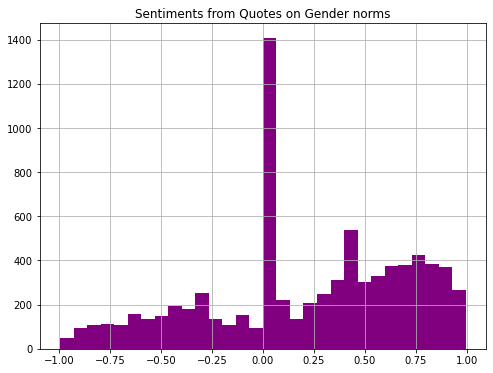

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
same_sex_marriage2["Sentiment"].hist(bins=30,
             ax=ax,
             color="purple")

plt.title("Sentiments from Quotes on Gender norms")
plt.show()

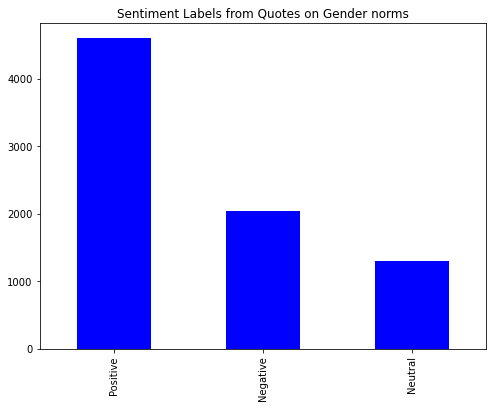

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
same_sex_marriage2["Sentiment Label"].value_counts().plot(kind ='bar',
             ax=ax,
             color="blue", )

plt.title("Sentiment Labels from Quotes on Gender norms")
plt.show()

### Time Series Analysis

In [40]:
df_time = same_sex_marriage2[['quote_year','quote_month']]

In [41]:
df_time['quote_day'] = np.ones(len(df_time), dtype = int)
df_time.columns = ['year', 'month', 'day']

<ipython-input-41-5c6cb609914e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['quote_day'] = np.ones(len(df_time), dtype = int)


In [42]:
df_time = pd.to_datetime(df_time)
same_sex_marriage2["Date"] = df_time
new_df_time = same_sex_marriage2.set_index('Date')

In [43]:
new_df_time.groupby('Date').mean()

,level_0,index,numOccurrences,quote_year,quote_month,Sentiment
Date,,,,,,
2015-01-01,48040.195980,56515.798995,3.844221,2015.0,1.0,0.164016
2015-02-01,47323.308081,55915.919192,3.227273,2015.0,2.0,0.109166
2015-03-01,50240.823810,59394.261905,2.004762,2015.0,3.0,0.297898
2015-04-01,44359.350427,52149.222222,3.735043,2015.0,4.0,0.191426
2015-05-01,39746.562249,46751.188755,2.337349,2015.0,5.0,0.246323
...,...,...,...,...,...,...
2019-12-01,67137.064516,80038.516129,6.322581,2019.0,12.0,0.164610
2020-01-01,41782.285714,49028.122449,4.510204,2020.0,1.0,0.172755
2020-02-01,38726.395833,45395.541667,2.083333,2020.0,2.0,0.156217


<AxesSubplot:xlabel='Date'>

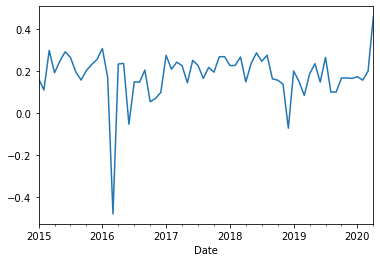

In [44]:
new_df_time.groupby('Date').mean()["Sentiment"].plot()

# Sentiment analysis on feminism

In [ ]:
filtered_json = pd.read_json("")